In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

2022-10-31 10:57:44.863185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-31 10:57:44.863234: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
file_path = 'dataset2/train'

In [5]:
name_class = os.listdir(file_path)
name_class

['Tomato___Bacterial_spot',
 'Grape___Black_rot',
 'Tomato___Septoria_leaf_spot',
 'Grape___healthy',
 'Corn___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Strawberry___Leaf_scorch',
 'Apple___Apple_scab',
 'Tomato___Leaf_Mold',
 'Corn___Northern_Leaf_Blight',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Early_blight',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Grape___Esca_(Black_Measles)',
 'Corn___Common_rust',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Black_rot']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths

['dataset2/train/Tomato___Bacterial_spot/image (766).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (509).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (1274).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (1487).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (2073).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (867).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (497).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (351).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (791).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (2035).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (1130).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (1127).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (210).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (811).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (1447).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (1313).JPG',
 'dataset2/train/Tomato___Bacterial_spot/image (

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial_spot',
 'Tomato___Bacterial

In [9]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,dataset2/train/Tomato___healthy/image (258).JPG,Tomato___healthy
1,dataset2/train/Apple___healthy/image (293).JPG,Apple___healthy
2,dataset2/train/Tomato___Late_blight/image (176...,Tomato___Late_blight
3,dataset2/train/Tomato___Tomato_Yellow_Leaf_Cur...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
4,dataset2/train/Tomato___Tomato_Yellow_Leaf_Cur...,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [10]:
#balancing

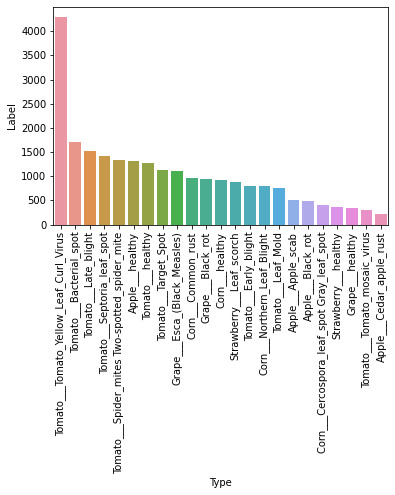

In [11]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [8]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

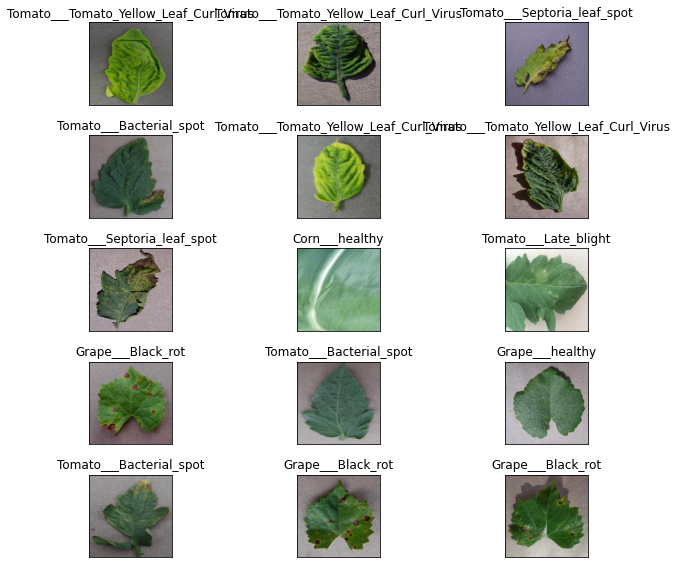

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 17833 validated image filenames belonging to 23 classes.
Found 5945 validated image filenames belonging to 23 classes.
Found 5945 validated image filenames belonging to 23 classes.


In [12]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2022-02-13 23:10:21.589239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-13 23:10:21.589462: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-13 23:10:21.589570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2022-02-13 23:10:21.591491: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(23, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [20]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/10
558/558 [==============================] - 795s 1s/step - loss: 0.5858 - accuracy: 0.8142 - val_loss: 0.3490 - val_accuracy: 0.8760
Epoch 2/10
558/558 [==============================] - 794s 1s/step - loss: 0.2500 - accuracy: 0.9121 - val_loss: 0.2408 - val_accuracy: 0.9139
Epoch 3/10
558/558 [==============================] - 789s 1s/step - loss: 0.1606 - accuracy: 0.9428 - val_loss: 0.2741 - val_accuracy: 0.9078
Epoch 4/10
558/558 [==============================] - 799s 1s/step - loss: 0.1239 - accuracy: 0.9554 - val_loss: 0.2086 - val_accuracy: 0.9304
Epoch 5/10
558/558 [==============================] - 792s 1s/step - loss: 0.1015 - accuracy: 0.9647 - val_loss: 0.2675 - val_accuracy: 0.9164
Epoch 6/10
558/558 [==============================] - 790s 1s/step - loss: 0.0876 - accuracy: 0.9687 - val_loss: 0.2174 - val_accuracy: 0.9283


In [21]:
model.save("model_resnet50.h5")  

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


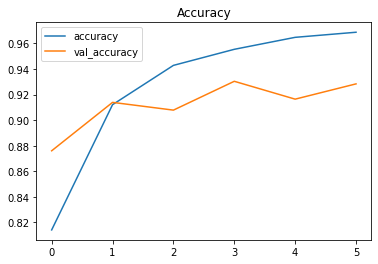

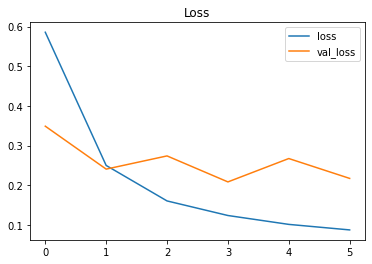

In [22]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [23]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.21739
Test Accuracy: 92.83%


In [24]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [25]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.92      0.82      0.87       129
                            Apple___Black_rot       0.99      0.87      0.92       126
                     Apple___Cedar_apple_rust       0.91      0.93      0.92        54
                              Apple___healthy       0.97      0.98      0.97       342
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.76      0.83      0.79       108
                           Corn___Common_rust       0.98      1.00      0.99       235
                  Corn___Northern_Leaf_Blight       0.90      0.86      0.88       218
                               Corn___healthy       1.00      0.99      0.99       241
                            Grape___Black_rot       0.94      0.88      0.91       241
                 Grape___Esca_(Black_Measles)       0.90      0.97      0.93       232
                              Grape___heal

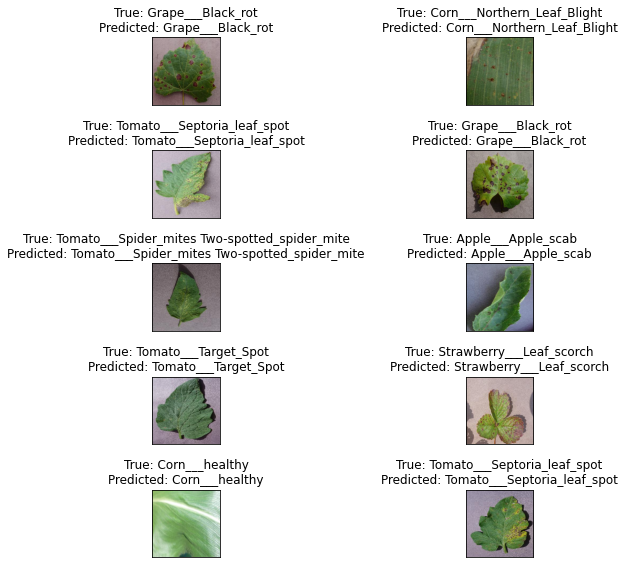

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [27]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'blackrot.JPG'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


[[ 0 99  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [1]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

2022-05-18 15:07:04.444355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 15:07:04.444409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-18 15:07:15.517961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 15:07:15.527833: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 15:07:15.528393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2022-05-18 15:07:15.532789: I tensorflow/core/plat

In [2]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'image (340).JPG'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


2022-05-18 15:07:31.481849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 15:07:31.535302: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2494210000 Hz


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0 83  0]]


In [8]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 83, 0]


In [10]:
print("Largest element is:", max(pp))

Largest element is: 83


In [12]:
index = pp.index(max(pp))

In [16]:
index=2

In [14]:
name_class=['normal', 'lung_opacity', 'viral_pnemonia', 'covid']

In [18]:
name_class[index]

'viral_pnemonia'

In [ ]:
['Tomato___Bacterial_spot',
 'Grape___Black_rot',
 'Tomato___Septoria_leaf_spot',
 'Grape___healthy',
 'Corn___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Strawberry___Leaf_scorch',
 'Apple___Apple_scab',
 'Tomato___Leaf_Mold',
 'Corn___Northern_Leaf_Blight',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Early_blight',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Grape___Esca_(Black_Measles)',
 'Corn___Common_rust',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Black_rot']